In [1]:
import pandas as pd
import os
from glob import glob

In [3]:
# Path to the training data folder
data_path = "physionet.org/files/challenge-2019/1.0.0/training/training_setB" 

In [5]:
# Collect all .psv files
psv_files = glob(os.path.join(data_path, "*.psv"))

In [7]:
# Function to load and add patient ID
def load_psv(file_path):
    df = pd.read_csv(file_path, sep='|')
    df['patient_id'] = os.path.basename(file_path).split('.')[0]
    return df

In [9]:
# Load all files into one DataFrame
all_data = pd.concat([load_psv(f) for f in psv_files], ignore_index=True)

In [11]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761995 entries, 0 to 761994
Data columns (total 42 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HR                669785 non-null  float64
 1   O2Sat             654338 non-null  float64
 2   Temp              258325 non-null  float64
 3   SBP               655931 non-null  float64
 4   MAP               649583 non-null  float64
 5   DBP               655738 non-null  float64
 6   Resp              600918 non-null  float64
 7   EtCO2             57636 non-null   float64
 8   BaseExcess        1764 non-null    float64
 9   HCO3              1411 non-null    float64
 10  FiO2              17210 non-null   float64
 11  pH                16958 non-null   float64
 12  PaCO2             17013 non-null   float64
 13  SaO2              14401 non-null   float64
 14  AST               13363 non-null   float64
 15  BUN               42092 non-null   float64
 16  Alkalinephos      13

In [85]:
# Count of SepsisLabel values
sepsis_counts = all_data['SepsisLabel'].value_counts()

# Print results
print(sepsis_counts)

# Optional: show percentages
print("\nPercentage distribution:")
print(sepsis_counts / sepsis_counts.sum() * 100)

SepsisLabel
0    751215
1     10780
Name: count, dtype: int64

Percentage distribution:
SepsisLabel
0    98.585293
1     1.414707
Name: count, dtype: float64


In [13]:
#check null values 
all_data.isnull().sum()

HR                   92210
O2Sat               107657
Temp                503670
SBP                 106064
MAP                 112412
DBP                 106257
Resp                161077
EtCO2               704359
BaseExcess          760231
HCO3                760584
FiO2                744785
pH                  745037
PaCO2               744982
SaO2                747594
AST                 748632
BUN                 719903
Alkalinephos        748586
Calcium             709982
Chloride            757306
Creatinine          719866
Bilirubin_direct    760187
Glucose             593135
Lactate             747692
Magnesium           725525
Phosphate           739590
Potassium           703306
Bilirubin_total     748547
TroponinI           748179
Hct                 717620
Hgb                 717225
PTT                 754602
WBC                 721896
Fibrinogen          757783
Platelets           721285
Age                      0
Gender                   0
Unit1               225795
U

In [15]:
missing_percentage = (all_data.isnull().sum() / len(all_data)) * 100

# Create a new column to store the missing percentage for each column
missing_percentage_df = pd.DataFrame(missing_percentage, columns=['Missing Percentage'])

# Display the result
missing_percentage_df.sort_values(by='Missing Percentage', ascending=False)

,Missing Percentage
HCO3,99.814828
BaseExcess,99.768502
Bilirubin_direct,99.762728
Fibrinogen,99.447240
Chloride,99.384642
PTT,99.029784
AST,98.246314
Alkalinephos,98.240277
Bilirubin_total,98.235159
TroponinI,98.186865


In [23]:
# Drop columns with >60% missing data
threshold = 70
cols_to_drop = missing_percentage_df[missing_percentage_df['Missing Percentage'] > threshold].index
data_cleaned = all_data.drop(columns=cols_to_drop)

In [25]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761995 entries, 0 to 761994
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   HR           669785 non-null  float64
 1   O2Sat        654338 non-null  float64
 2   Temp         258325 non-null  float64
 3   SBP          655931 non-null  float64
 4   MAP          649583 non-null  float64
 5   DBP          655738 non-null  float64
 6   Resp         600918 non-null  float64
 7   Age          761995 non-null  int64  
 8   Gender       761995 non-null  int64  
 9   Unit1        536200 non-null  float64
 10  Unit2        536200 non-null  float64
 11  HospAdmTime  761995 non-null  float64
 12  ICULOS       761995 non-null  int64  
 13  SepsisLabel  761995 non-null  int64  
 14  patient_id   761995 non-null  object 
dtypes: float64(10), int64(4), object(1)
memory usage: 87.2+ MB


In [27]:
data_cleaned.isnull().sum()

HR              92210
O2Sat          107657
Temp           503670
SBP            106064
MAP            112412
DBP            106257
Resp           161077
Age                 0
Gender              0
Unit1          225795
Unit2          225795
HospAdmTime         0
ICULOS              0
SepsisLabel         0
patient_id          0
dtype: int64

In [29]:
#drop null columns one by one:
data_cleaned = data_cleaned.dropna(subset=['HR'])

In [33]:
data_cleaned = data_cleaned.dropna(subset=['SBP'])

In [37]:
data_cleaned = data_cleaned.dropna(subset=['MAP'])

In [41]:
#Since DBP can be calculate using SBP and MAP, we can drop the column
data_cleaned.drop(columns=['DBP'], inplace=True)

In [45]:
data_cleaned = data_cleaned.dropna(subset=['Resp'])

In [49]:
data_cleaned = data_cleaned.dropna(subset=['O2Sat'])

In [51]:
data_cleaned.isnull().sum()

HR                  0
O2Sat               0
Temp           347609
SBP                 0
MAP                 0
Resp                0
Age                 0
Gender              0
Unit1          156329
Unit2          156329
HospAdmTime         0
ICULOS              0
SepsisLabel         0
patient_id          0
dtype: int64

In [53]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574921 entries, 2 to 761994
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   HR           574921 non-null  float64
 1   O2Sat        574921 non-null  float64
 2   Temp         227312 non-null  float64
 3   SBP          574921 non-null  float64
 4   MAP          574921 non-null  float64
 5   Resp         574921 non-null  float64
 6   Age          574921 non-null  int64  
 7   Gender       574921 non-null  int64  
 8   Unit1        418592 non-null  float64
 9   Unit2        418592 non-null  float64
 10  HospAdmTime  574921 non-null  float64
 11  ICULOS       574921 non-null  int64  
 12  SepsisLabel  574921 non-null  int64  
 13  patient_id   574921 non-null  object 
dtypes: float64(9), int64(4), object(1)
memory usage: 65.8+ MB


In [59]:
data_cleaned

,HR,O2Sat,Temp,SBP,MAP,Resp,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,patient_id
2,102.0,100.0,NaN,99.0,84.0,18.5,59,1,1.0,0.0,-6.01,3,0,p116812
3,124.0,100.0,NaN,97.0,70.0,16.0,59,1,1.0,0.0,-6.01,4,0,p116812
4,98.0,100.0,NaN,95.0,73.0,18.0,59,1,1.0,0.0,-6.01,5,0,p116812
5,101.0,100.0,NaN,120.0,85.0,21.0,59,1,1.0,0.0,-6.01,6,0,p116812
6,101.0,100.0,36.6,120.0,85.0,20.0,59,1,1.0,0.0,-6.01,7,0,p116812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761990,73.0,96.0,NaN,119.0,75.0,23.5,67,0,NaN,NaN,-11.93,17,0,p118826
761991,76.0,96.0,36.9,138.0,88.0,21.5,67,0,NaN,NaN,-11.93,18,0,p118826
761992,76.0,96.0,NaN,135.5,88.0,21.5,67,0,NaN,NaN,-11.93,19,0,p118826
761993,69.0,96.0,NaN,122.5,77.5,20.5,67,0,NaN,NaN,-11.93,20,0,p118826


Missing rate for Temp: 60.46%


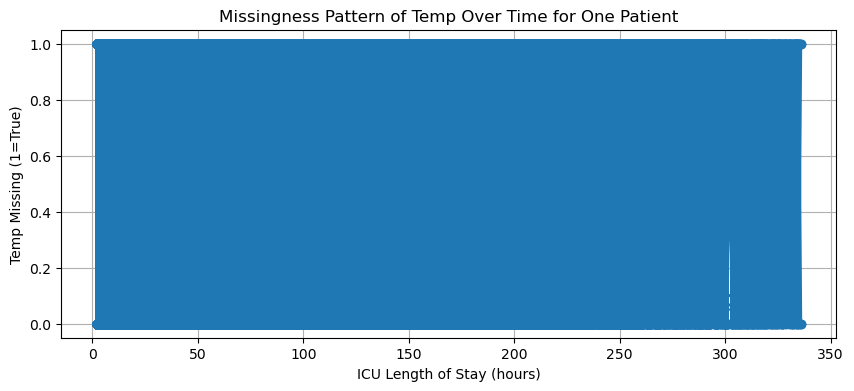

In [67]:
# Check overall missing rate for Temp
missing_rate = data_cleaned['Temp'].isna().mean()
print(f"Missing rate for Temp: {missing_rate:.2%}")

# Plot missingness over time (ICU hours)
plt.figure(figsize=(10, 4))
plt.plot(data_cleaned['ICULOS'], data_cleaned['Temp'].isna(), marker='o', linestyle='-')
plt.xlabel('ICU Length of Stay (hours)')
plt.ylabel('Temp Missing (1=True)')
plt.title('Missingness Pattern of Temp Over Time for One Patient')
plt.grid(True)
plt.show()

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

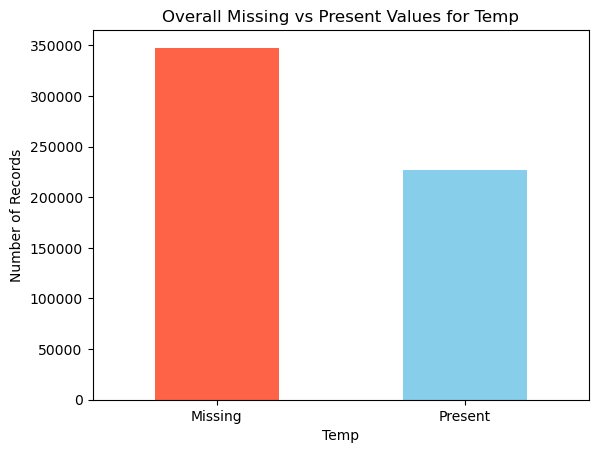

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace this with your actual DataFrame
# df_all = pd.read_csv("combined_patient_data.csv")

missing_counts = data_cleaned['Temp'].isna().value_counts().rename({True: 'Missing', False: 'Present'})

missing_counts.plot(kind='bar', color=['tomato', 'skyblue'])
plt.title('Overall Missing vs Present Values for Temp')
plt.ylabel('Number of Records')
plt.xticks(rotation=0)
plt.show()

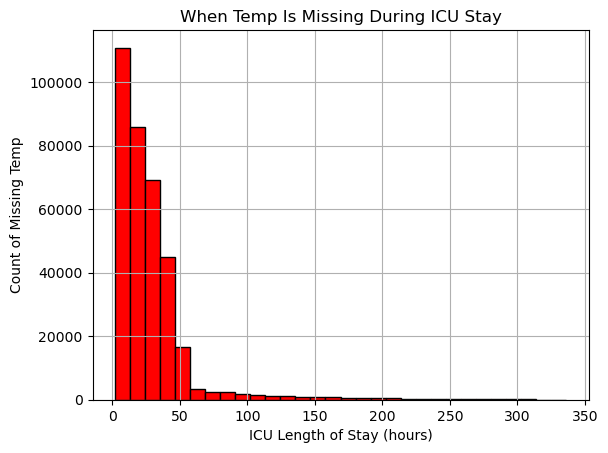

In [71]:
data_cleaned[data_cleaned['Temp'].isna()]['ICULOS'].plot(kind='hist', bins=30, color='red', edgecolor='black')
plt.title('When Temp Is Missing During ICU Stay')
plt.xlabel('ICU Length of Stay (hours)')
plt.ylabel('Count of Missing Temp')
plt.grid(True)
plt.show()

In [73]:
# Replace 'PatientID' with the actual column name that identifies each patient
missing_temp_counts = data_cleaned[data_cleaned['Temp'].isna()].groupby('patient_id').size()

# Preview
missing_temp_counts.head()


patient_id
p100001    17
p100003    20
p100004    36
p100005    20
p100006    19
dtype: int64

In [75]:
missing_temp_counts

patient_id
p100001    17
p100003    20
p100004    36
p100005    20
p100006    19
           ..
p119996    26
p119997    10
p119998    24
p119999    13
p120000    24
Length: 17761, dtype: int64

In [77]:

# To include patients with 0 missing values too
all_patients = data_cleaned['patient_id'].unique()
missing_temp_counts = missing_temp_counts.reindex(all_patients, fill_value=0)

In [79]:
missing_temp_counts

patient_id
p116812    28
p109932     2
p102867     3
p114963    23
p100916    30
           ..
p119286     9
p105877    22
p113973    42
p107906    25
p118826    14
Length: 19826, dtype: int64

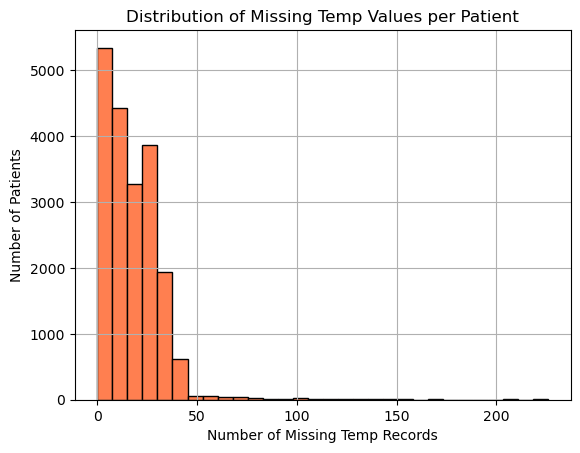

In [81]:
import matplotlib.pyplot as plt

missing_temp_counts.plot(kind='hist', bins=30, color='coral', edgecolor='black')
plt.title('Distribution of Missing Temp Values per Patient')
plt.xlabel('Number of Missing Temp Records')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.show()

In [83]:
# Count of SepsisLabel values
sepsis_counts = data_cleaned['SepsisLabel'].value_counts()

# Print results
print(sepsis_counts)

# Optional: show percentages
print("\nPercentage distribution:")
print(sepsis_counts / sepsis_counts.sum() * 100)

SepsisLabel
0    567071
1      7850
Name: count, dtype: int64

Percentage distribution:
SepsisLabel
0    98.634595
1     1.365405
Name: count, dtype: float64


In [87]:
data_final = data_cleaned.dropna(subset=['Temp'])

In [89]:
data_final.isnull().sum()

HR                 0
O2Sat              0
Temp               0
SBP                0
MAP                0
Resp               0
Age                0
Gender             0
Unit1          46457
Unit2          46457
HospAdmTime        0
ICULOS             0
SepsisLabel        0
patient_id         0
dtype: int64

In [91]:
data_final

,HR,O2Sat,Temp,SBP,MAP,Resp,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,patient_id
6,101.0,100.0,36.6,120.0,85.0,20.0,59,1,1.0,0.0,-6.01,7,0,p116812
10,87.0,100.0,36.0,115.0,83.0,20.0,59,1,1.0,0.0,-6.01,11,0,p116812
14,81.0,100.0,36.0,101.0,71.0,20.0,59,1,1.0,0.0,-6.01,15,0,p116812
18,87.0,100.0,36.7,112.0,86.0,20.0,59,1,1.0,0.0,-6.01,19,0,p116812
22,93.0,98.0,36.2,108.0,80.0,18.0,59,1,1.0,0.0,-6.01,23,0,p116812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761975,62.0,96.5,35.9,154.0,100.0,22.0,67,0,NaN,NaN,-11.93,2,0,p118826
761979,72.0,97.0,36.5,193.0,126.0,26.0,67,0,NaN,NaN,-11.93,6,0,p118826
761983,78.0,95.0,37.3,151.0,95.0,16.0,67,0,NaN,NaN,-11.93,10,0,p118826
761988,81.0,94.0,37.2,133.5,94.0,23.0,67,0,NaN,NaN,-11.93,15,0,p118826


In [96]:
# Count of SepsisLabel values
sepsis_counts = data_final['SepsisLabel'].value_counts()

# Print results
print(sepsis_counts)

# Optional: show percentages
print("\nPercentage distribution:")
print(sepsis_counts / sepsis_counts.sum() * 100)

SepsisLabel
0    223999
1      3313
Name: count, dtype: int64

Percentage distribution:
SepsisLabel
0    98.542532
1     1.457468
Name: count, dtype: float64


In [98]:
# Create encoded columns
data_final['Unit1_encoded'] = data_final['Unit1'].apply(lambda x: 1 if x == 1.0 else 0)
data_final['Unit2_encoded'] = data_final['Unit2'].apply(lambda x: 1 if x == 1.0 else 0)
data_final['Unit_Unknown'] = data_final.apply(
    lambda row: 1 if pd.isna(row['Unit1']) and pd.isna(row['Unit2']) else 0, axis=1
)

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_26531/321473815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['Unit1_encoded'] = data_final['Unit1'].apply(lambda x: 1 if x == 1.0 else 0)
/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_26531/321473815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['Unit2_encoded'] = data_final['Unit2'].apply(lambda x: 1 if x == 1.0 else 0)
/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_26531/321473815.py:4: S

In [102]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227312 entries, 6 to 761991
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   HR             227312 non-null  float64
 1   O2Sat          227312 non-null  float64
 2   Temp           227312 non-null  float64
 3   SBP            227312 non-null  float64
 4   MAP            227312 non-null  float64
 5   Resp           227312 non-null  float64
 6   Age            227312 non-null  int64  
 7   Gender         227312 non-null  int64  
 8   Unit1          180855 non-null  float64
 9   Unit2          180855 non-null  float64
 10  HospAdmTime    227312 non-null  float64
 11  ICULOS         227312 non-null  int64  
 12  SepsisLabel    227312 non-null  int64  
 13  patient_id     227312 non-null  object 
 14  Unit1_encoded  227312 non-null  int64  
 15  Unit2_encoded  227312 non-null  int64  
 16  Unit_Unknown   227312 non-null  int64  
dtypes: float64(9), int64(7), object(1)

In [104]:
# Select only the necessary columns
selected_columns = [
    'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'Resp',
    'Age', 'Gender', 'HospAdmTime', 'ICULOS',
    'SepsisLabel', 'patient_id',
    'Unit1_encoded', 'Unit2_encoded', 'Unit_Unknown'
]

# Create a new DataFrame
data_final_B = data_final[selected_columns]

# Save it to CSV
data_final_B.to_csv('sepsis_cleaned_data_train_B.csv', index=False)